In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops

In [3]:
import opendatasets as od
import pandas as pd
od.download("https://www.kaggle.com/datasets/koryakinp/fingers")

Skipping, found downloaded files in ".\fingers" (use force=True to force download)


In [4]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [8]:
import os
print(os.getcwd())


C:\Users\Jeevesh Narayan\jeevesh_bcs1


In [10]:
import os
import cv2
import numpy as np

dataset_dir =dataset_dir = 'C:\\Users\\Jeevesh Narayan\\jeevesh_bcs1\\fingers\\test'

images = []
labels = []
for filename in os.listdir(dataset_dir):
    img = cv2.imread(os.path.join(dataset_dir, filename), cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (64, 64))
    images.append(img_resized)
    label =int(filename[37])
    labels.append(label)
images=np.array(images)
labels=np.array(labels)
labels

array([5, 5, 3, ..., 4, 3, 3])

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.15,random_state=42)
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [12]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train, num_classes=6)
Y_test = to_categorical(y_test, num_classes=6)

In [13]:
print ("Y_train shape: " + str(Y_train.shape))
print ("Y_test shape: " + str(Y_test.shape))

Y_train shape: (3060, 6)
Y_test shape: (540, 6)


In [14]:
def convolutional_model(input_shape):
    input_img = tf.keras.Input(shape=input_shape)
    model = tf.keras.Sequential([
        tfl.Conv2D(8, (4, 4), strides=(1, 1), padding='same', input_shape=input_shape),
        tfl.Activation('relu'),
        tfl.MaxPooling2D((8, 8), strides=(8, 8), padding='same'),
        tfl.Conv2D(16, (2, 2), strides=(1, 1), padding='same'),
        tfl.Activation('relu'),
        tfl.MaxPooling2D((4, 4), strides=(4, 4), padding='same'),
        tfl.Flatten(),
        tfl.Dense(6, activation='softmax')
    ])
    return model

In [15]:
conv_model = convolutional_model((64, 64, 1))
conv_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
conv_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         136       
                                                                 
 activation (Activation)     (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 8, 8)          0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 activation_1 (Activation)   (None, 8, 8, 16)          0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                    

In [16]:
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices((x_train[:1800], Y_train[:1800]))
train_dataset = train_dataset.batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test[:300], Y_test[:300]))
test_dataset = test_dataset.batch(batch_size)

In [17]:
history = conv_model.fit(train_dataset, epochs=20, validation_data=test_dataset)

Epoch 1/20
57/57 [==============================] - 4s 31ms/step - loss: 13.9396 - accuracy: 0.2350 - val_loss: 2.4241 - val_accuracy: 0.3733
Epoch 2/20
57/57 [==============================] - 2s 27ms/step - loss: 1.9240 - accuracy: 0.4383 - val_loss: 1.5827 - val_accuracy: 0.4700
Epoch 3/20
57/57 [==============================] - 2s 34ms/step - loss: 1.2649 - accuracy: 0.5667 - val_loss: 1.0626 - val_accuracy: 0.6333
Epoch 4/20
57/57 [==============================] - 2s 28ms/step - loss: 0.8624 - accuracy: 0.6839 - val_loss: 0.7338 - val_accuracy: 0.7367
Epoch 5/20
57/57 [==============================] - 1s 26ms/step - loss: 0.5732 - accuracy: 0.7928 - val_loss: 0.5603 - val_accuracy: 0.8033
Epoch 6/20
57/57 [==============================] - 2s 27ms/step - loss: 0.4152 - accuracy: 0.8628 - val_loss: 0.4593 - val_accuracy: 0.8533
Epoch 7/20
57/57 [==============================] - 1s 25ms/step - loss: 0.3170 - accuracy: 0.8950 - val_loss: 0.4143 - val_accuracy: 0.8733
Epoch 8/20
5

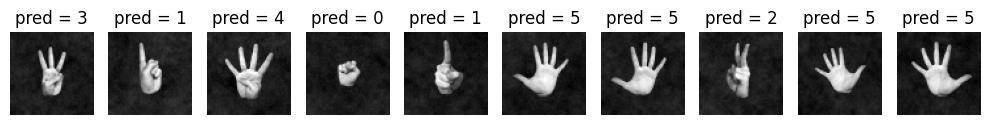

In [18]:
import random
import cv2
from matplotlib import pyplot as plt

numbers = list(range(1, 540))
random_array = random.sample(numbers, 10)

fig = plt.figure(figsize=(10, 7))

for i, idx in enumerate(random_array):
    img_resized = cv2.resize(x_test[idx], (64, 64))
    y_pred = np.argmax(conv_model.predict(np.expand_dims(x_test[idx], axis=0),verbose=0))
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(img_resized, cmap='gray')
    ax.axis('off')
    ax.set_title("pred = " + str(y_pred))

plt.tight_layout()
plt.show()